# Oclusão

In [214]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json
import os
import random as rnd

In [4]:
from keras.models import load_model
from keras.metrics import Precision as kpm
from keras.metrics import Recall as krm

Using TensorFlow backend.


In [5]:
from ocl_cal import oclusion

In [6]:
from dataPreprocess import prepare_data, make_and_save_dict, map_words_and_tags, pad_seq, get_sets

In [256]:
tag2idx = {'I-PER': 0,
           'I-MISC': 1,
           'I-LOC': 2,
           'B-LOC': 3,
           'I-ORG': 4,
           'O': 5,
           'B-ORG': 6,
           'B-MISC': 7,
           'B-PER': 8,
          }
num_tags = len(tag2idx)
tags_set = get_sets(tag2idx)

In [257]:
# import word dict and tag dict
word_dict2 = '../model_hu/word_dict2.pkl'
with open(word_dict2, 'rb') as f:
    word2idx = pickle.load(f)
num_words = len(word2idx)
words_set = get_sets(word2idx)
words_set = {}
for wd in word2idx:
    words_set.update({word2idx[wd]: wd})
len(word2idx)

26870

## Import Dataset

In [258]:
# dataset
max_len = 75
num_tags = len(tags_set)
teste = '../conll2003/test.txt'
X_te, y_te = prepare_data(teste, num_tags, max_len, word2idx, tag2idx)
treino = '../conll2003/train.txt'
X_tr, y_tr = prepare_data(treino, num_tags, max_len, word2idx, tag2idx)
valida = '../conll2003/valid.txt'
X_va, y_va = prepare_data(valida, num_tags, max_len, word2idx, tag2idx)
len(X_tr), len(X_te), len(X_va)

C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(14041, 3453, 3250)

In [259]:
X_full = X_tr.tolist() + X_te.tolist() + X_va.tolist()
X_full = np.array(X_full)
y_full = y_tr + y_te + y_va
len(X_full), len(y_full)

(20744, 20744)

## Import Models

In [406]:
model1 = '../project_models/828model_glove.h5'
model2 = '../project_models/828model_glove.h10'
model3 = '../project_models/828model_glove.h20'
#model4 = '../project_models/828model_glove.h50'
#model5 = '../project_models/828model_glove.h100'
#models_folders = [model1, model2, model3, model4, model5]

In [407]:
models_folders = [model1, model2, model3]

In [410]:
models = []
for m in models_folders:
    models.append(load_model(m))
len(models)

3

## Reports

In [222]:
sentences_path = '../occlusion_NER/json/sentences/'
sentences = os.listdir(sentences_path)
sentences1000 = []
for sentence_list in sentences:
    data_json_path = sentences_path + sentence_list
    data_json = open(data_json_path)
    data_dict = json.load(data_json)
    data_json.close()
    sentences1000 += data_dict['sentences']
len(sentences1000), sentences1000[1]

(1000,
 {'id': 5466,
  'sentence': ['dinamo', 'bucharest', '4', '3', '0', '1', '6', '2', '9'],
  'idxAlvo': 1,
  'predictClass': 'I-ORG'})

In [223]:
sent_idx_list = []
for sent in sentences1000:
    sent_idx_list.append(sent['id'])
sent_idx_list[:10]

[21121, 5466, 19135, 21553, 3722, 4478, 21388, 18892, 7843, 14351]

In [224]:
sents_01_path = '../occlusion_NER/json/reports/sents_01/'
sents_01 = os.listdir(sents_01_path)
sents_01

['diego_001_a_050.json',
 'diego_051_a_100.json',
 'diego_101_a_150.json',
 'diego_151_a_200.json',
 'kaique_bolonezi_1_a_70.json',
 'kaique_bolonezi_71_a_200.json',
 'leticia_1_a_200.json']

In [225]:
sents_02_path = '../occlusion_NER/json/reports/sents_02_(falta a bianca)/'
sents_02 = os.listdir(sents_02_path)
sents_02

['julia_reis_total.json',
 'mateus_001_a_056.json',
 'mateus_056_a_150.json',
 'mateus_150_a_200.json']

In [226]:
sents_03_path = '../occlusion_NER/json/reports/sents_03/'
sents_03 = os.listdir(sents_03_path)
sents_03

['artur_bernardo_001_a_050.json',
 'artur_bernardo_051_a_100.json',
 'artur_bernardo_100_a_150.json',
 'artur_bernardo_150_a_200.json',
 'diego_sents_03_001_a_200.json',
 'felipe_dutra_100_a_150.json',
 'felipe_dutra_151_a_200.json',
 'felipe_dutra_1_a_50.json',
 'felipe_dutra_50_a_100.json']

In [227]:
sents_04_path = '../occlusion_NER/json/reports/sents_04_(falta a bianca)/'
sents_04 = os.listdir(sents_04_path)
sents_04

['daniel_cardoso(1-100).json',
 'daniel_cardoso(101-200).json',
 'samuel_gadoni_101_a_150.json',
 'samuel_gadoni_151_a_200.json',
 'samuel_gadoni_1_a_50.json',
 'samuel_gadoni_50_a_100.json']

In [228]:
sents_05_path = '../occlusion_NER/json/reports/sents_05/'
sents_05 = os.listdir(sents_05_path)
sents_05

['diego.json', 'ronaldo.json', 'rosane.json']

In [229]:
data_json_path0 = sents_01_path + sents_01[0]
data_json_path1 = sents_01_path + sents_01[1]
data_json_path2 = sents_01_path + sents_01[2]
data_json_path3 = sents_01_path + sents_01[3]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

data_json2 = open(data_json_path2)
data_dict2 = json.load(data_json2)
data_json2.close()

data_json3 = open(data_json_path3)
data_dict3 = json.load(data_json3)
data_json3.close()

print(len(data_dict3))

sents_01_diego = data_dict0[:50] + data_dict1[50:100] + data_dict2[100:150] + data_dict3[150:200]

len(sents_01_diego), sents_01_diego[101]

1000


(200,
 {'id': 101,
  'idxAlvo': 1,
  'verified': True,
  'relevance': [False, True, True, False, False, True]})

In [230]:
data_json_path0 = sents_01_path + sents_01[4]
data_json_path1 = sents_01_path + sents_01[5]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

print(len(data_dict1))

sents_01_kaique = data_dict0[:70] + data_dict1[70:200]

len(sents_01_kaique), sents_01_kaique[101]

200


(200,
 {'id': 101,
  'idxAlvo': 1,
  'verified': True,
  'relevance': [False, True, True, True, False, False]})

In [231]:
data_json_path0 = sents_01_path + sents_01[6]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_01_leticia = data_dict0[:200]

len(sents_01_leticia), sents_01_leticia[101]

200


(200,
 {'id': 101,
  'idxAlvo': 1,
  'verified': True,
  'relevance': [False, True, True, False, False, False]})

In [232]:
data_json_path0 = sents_02_path + sents_02[0]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_02_julia = data_dict0[:200]

len(sents_02_julia), sents_02_julia[1]

200


(200,
 {'id': 1,
  'idxAlvo': 0,
  'verified': True,
  'relevance': [True, True, False, False, False, False, False]})

In [233]:
data_json_path1 = sents_02_path + sents_02[1]
data_json_path2 = sents_02_path + sents_02[2]
data_json_path3 = sents_02_path + sents_02[3]

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

data_json2 = open(data_json_path2)
data_dict2 = json.load(data_json2)
data_json2.close()

data_json3 = open(data_json_path3)
data_dict3 = json.load(data_json3)
data_json3.close()

print(len(data_dict3))

sents_02_mateus = data_dict1[:56] + data_dict2[56:150] + data_dict3[150:200]

len(sents_02_mateus), sents_02_mateus[1]

200


(200,
 {'id': 1,
  'idxAlvo': 0,
  'verified': True,
  'relevance': [False, False, False, False, False, False, False]})

In [234]:
data_json_path0 = sents_03_path + sents_03[0]
data_json_path1 = sents_03_path + sents_03[1]
data_json_path2 = sents_03_path + sents_03[2]
data_json_path3 = sents_03_path + sents_03[3]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

data_json2 = open(data_json_path2)
data_dict2 = json.load(data_json2)
data_json2.close()

data_json3 = open(data_json_path3)
data_dict3 = json.load(data_json3)
data_json3.close()

print(len(data_dict3))

sents_03_artur = data_dict0[:50] + data_dict1[50:100] + data_dict2[100:150] + data_dict3[150:200]

len(sents_03_artur), sents_03_artur[0]

200


(200,
 {'id': 0,
  'idxAlvo': 0,
  'verified': True,
  'relevance': [True,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False]})

In [235]:
data_json_path0 = sents_03_path + sents_03[4]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_03_diego = data_dict0[:200]

len(sents_03_diego), sents_03_diego[0]

200


(200,
 {'id': 0,
  'idxAlvo': 0,
  'verified': True,
  'relevance': [True,
   True,
   False,
   False,
   False,
   False,
   True,
   True,
   False,
   False,
   False,
   False,
   False]})

In [236]:
data_json_path0 = sents_03_path + sents_03[7]
data_json_path1 = sents_03_path + sents_03[8]
data_json_path2 = sents_03_path + sents_03[5]
data_json_path3 = sents_03_path + sents_03[6]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

data_json2 = open(data_json_path2)
data_dict2 = json.load(data_json2)
data_json2.close()

data_json3 = open(data_json_path3)
data_dict3 = json.load(data_json3)
data_json3.close()

print(len(data_dict3))

sents_03_felipe = data_dict0[:50] + data_dict1[50:100] + data_dict2[100:150] + data_dict3[150:200]

len(sents_03_felipe), sents_03_felipe[0]

200


(200,
 {'id': 0,
  'idxAlvo': 0,
  'verified': True,
  'relevance': [True,
   True,
   False,
   False,
   False,
   False,
   True,
   True,
   False,
   False,
   False,
   False,
   False]})

In [237]:
data_json_path0 = sents_04_path + sents_04[0]
data_json_path1 = sents_04_path + sents_04[1]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

print(len(data_dict1))

sents_04_daniel = data_dict0[:100] + data_dict1[100:200]

len(sents_04_daniel), sents_04_daniel[0]

200


(200,
 {'id': 0,
  'idxAlvo': 4,
  'verified': True,
  'relevance': [False,
   False,
   False,
   False,
   True,
   True,
   False,
   False,
   False,
   False,
   False]})

In [238]:
data_json_path0 = sents_04_path + sents_04[4]
data_json_path1 = sents_04_path + sents_04[5]
data_json_path2 = sents_04_path + sents_04[2]
data_json_path3 = sents_04_path + sents_04[3]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

data_json1 = open(data_json_path1)
data_dict1 = json.load(data_json1)
data_json1.close()

data_json2 = open(data_json_path2)
data_dict2 = json.load(data_json2)
data_json2.close()

data_json3 = open(data_json_path3)
data_dict3 = json.load(data_json3)
data_json3.close()

print(len(data_dict3))

sents_04_samuel = data_dict0[:50] + data_dict1[50:100] + data_dict2[100:150] + data_dict3[150:200]

len(sents_04_samuel), sents_04_samuel[0]

200


(200,
 {'id': 0,
  'idxAlvo': 4,
  'verified': True,
  'relevance': [False,
   False,
   False,
   False,
   True,
   False,
   False,
   False,
   True,
   False,
   False]})

In [239]:
data_json_path0 = sents_05_path + sents_05[0]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_05_diego = data_dict0[:200]

len(sents_05_diego), sents_05_diego[4]

200


(200,
 {'id': 4,
  'idxAlvo': 11,
  'verified': True,
  'relevance': [False,
   False,
   False,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   True,
   False]})

In [240]:
data_json_path0 = sents_05_path + sents_05[1]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_05_ronaldo = data_dict0[:200]

len(sents_05_ronaldo), sents_05_ronaldo[4]

200


(200,
 {'id': 4,
  'idxAlvo': 11,
  'verified': True,
  'relevance': [False,
   False,
   False,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   True,
   True,
   False]})

In [241]:
data_json_path0 = sents_05_path + sents_05[2]

data_json0 = open(data_json_path0)
data_dict0 = json.load(data_json0)
data_json0.close()

print(len(data_dict0))

sents_05_rosane = data_dict0[:200]

len(sents_05_rosane), sents_05_rosane[4]

200


(200,
 {'id': 4,
  'idxAlvo': 11,
  'verified': True,
  'relevance': [False,
   False,
   True,
   True,
   False,
   False,
   False,
   False,
   False,
   False,
   True,
   True,
   False]})

In [242]:
sents01_conc = []
for sent, vol01, vol02, vol03 in zip(sentences1000[:200], sents_01_diego, sents_01_kaique, sents_01_leticia):
    if len(sent['sentence']) != len(vol01['relevance']):
        print('ERROR')
    vol01_true = np.where(np.array(vol01['relevance']) == True)
    vol02_true = np.where(np.array(vol02['relevance']) == True)
    vol03_true = np.where(np.array(vol03['relevance']) == True)
    conc_vol = set.intersection(set(vol01_true[0].tolist()), set(vol02_true[0].tolist()), set(vol03_true[0].tolist()))
    conc = {'id': sent['id'],
            'sentence': sent['sentence'],
            'idxAlvo': sent['idxAlvo'],
            'trueTag': sent['predictClass'],
            'relevanceBag': list(conc_vol)}
    sents01_conc.append(conc)
len(sents01_conc), sents01_conc[101]

(200,
 {'id': 1724,
  'sentence': ['--', 'new', 'delhi', 'newsroom', ',', '+91-11-3012024'],
  'idxAlvo': 1,
  'trueTag': 'B-LOC',
  'relevanceBag': [1, 2]})

In [243]:
sents02_conc = []
for sent, vol01, vol02 in zip(sentences1000[200:400], sents_02_julia, sents_02_mateus):
    if len(sent['sentence']) != len(vol01['relevance']):
        print('ERROR')
    vol01_true = np.where(np.array(vol01['relevance']) == True)
    vol02_true = np.where(np.array(vol02['relevance']) == True)
    conc_vol = set.intersection(set(vol01_true[0].tolist()), set(vol02_true[0].tolist()))
    conc = {'id': sent['id'],
            'sentence': sent['sentence'],
            'idxAlvo': sent['idxAlvo'],
            'trueTag': sent['predictClass'],
            'relevanceBag': list(conc_vol)}
    sents02_conc.append(conc)
len(sents02_conc), sents02_conc[1]

(200,
 {'id': 14706,
  'sentence': ['airport',
   'facilities',
   '-',
   '6mth',
   'parent',
   'forecast',
   '.'],
  'idxAlvo': 0,
  'trueTag': 'B-ORG',
  'relevanceBag': []})

In [244]:
sents03_conc = []
for sent, vol01, vol02, vol03 in zip(sentences1000[400:600], sents_03_artur, sents_03_diego, sents_03_felipe):
    if len(sent['sentence']) != len(vol01['relevance']):
        print('ERROR')
    vol01_true = np.where(np.array(vol01['relevance']) == True)
    vol02_true = np.where(np.array(vol02['relevance']) == True)
    vol03_true = np.where(np.array(vol03['relevance']) == True)
    conc_vol = set.intersection(set(vol01_true[0].tolist()), set(vol02_true[0].tolist()), set(vol03_true[0].tolist()))
    conc = {'id': sent['id'],
            'sentence': sent['sentence'],
            'idxAlvo': sent['idxAlvo'],
            'trueTag': sent['predictClass'],
            'relevanceBag': list(conc_vol)}
    sents03_conc.append(conc)
len(sents03_conc), sents03_conc[0]

(200,
 {'id': 8925,
  'sentence': ['dan',
   'jensen',
   '(',
   'australia',
   ')',
   'beat',
   'anders',
   'thoren',
   '(',
   'sweden',
   ')',
   '8-15',
   '15-12'],
  'idxAlvo': 0,
  'trueTag': 'B-PER',
  'relevanceBag': [0, 1]})

In [245]:
sents04_conc = []
for sent, vol01, vol02 in zip(sentences1000[600:800], sents_04_daniel, sents_04_samuel):
    if len(sent['sentence']) != len(vol01['relevance']):
        print('ERROR')
    vol01_true = np.where(np.array(vol01['relevance']) == True)
    vol02_true = np.where(np.array(vol02['relevance']) == True)
    conc_vol = set.intersection(set(vol01_true[0].tolist()), set(vol02_true[0].tolist()))
    conc = {'id': sent['id'],
            'sentence': sent['sentence'],
            'idxAlvo': sent['idxAlvo'],
            'trueTag': sent['predictClass'],
            'relevanceBag': list(conc_vol)}
    sents04_conc.append(conc)
len(sents04_conc), sents04_conc[0]

(200,
 {'id': 14878,
  'sentence': ['soccer',
   '-',
   'wales',
   'beat',
   'san',
   'marino',
   '4-0',
   'in',
   'under-21',
   'match',
   '.'],
  'idxAlvo': 4,
  'trueTag': 'B-LOC',
  'relevanceBag': [4]})

In [246]:
sents05_conc = []
for sent, vol01, vol02, vol03 in zip(sentences1000[800:1000], sents_05_diego, sents_05_ronaldo, sents_05_rosane):
    if len(sent['sentence']) != len(vol01['relevance']):
        print('ERROR')
    vol01_true = np.where(np.array(vol01['relevance']) == True)
    vol02_true = np.where(np.array(vol02['relevance']) == True)
    vol03_true = np.where(np.array(vol03['relevance']) == True)
    conc_vol = set.intersection(set(vol01_true[0].tolist()), set(vol02_true[0].tolist()), set(vol03_true[0].tolist()))
    conc = {'id': sent['id'],
            'sentence': sent['sentence'],
            'idxAlvo': sent['idxAlvo'],
            'trueTag': sent['predictClass'],
            'relevanceBag': list(conc_vol)}
    sents05_conc.append(conc)
len(sents05_conc), sents05_conc[4]

(200,
 {'id': 7971,
  'sentence': ['contracts',
   'traded',
   'in',
   'singapore',
   'are',
   'mutually',
   'offset',
   'against',
   'contracts',
   'traded',
   'in',
   'london',
   '.'],
  'idxAlvo': 11,
  'trueTag': 'B-LOC',
  'relevanceBag': [11, 3]})

In [247]:
sent_conc = sents01_conc + sents02_conc + sents03_conc + sents04_conc + sents05_conc

In [1290]:
sent_conc_k0 = []
sent_conc_k1 = []
sent_conc_k2 = []
sent_conc_k3 = []
sent_conc_k4more = []
for sent in sent_conc:
    if sent['idxAlvo'] in sent['relevanceBag']:
        sent['relevanceBag'].remove(sent['idxAlvo'])
    if len(sent['relevanceBag']) == 1:
        sent_conc_k1.append(sent)
    elif len(sent['relevanceBag']) == 2:
        sent_conc_k2.append(sent)
    elif len(sent['relevanceBag']) == 3:
        sent_conc_k3.append(sent)
    elif len(sent['relevanceBag']) > 3:
        sent_conc_k4more.append(sent)
    else:
        sent_conc_k0.append(sent)
print(len(sent_conc_k0) + len(sent_conc_k1) + len(sent_conc_k2) + len(sent_conc_k3) + len(sent_conc_k4more))
len(sent_conc_k0), len(sent_conc_k1), len(sent_conc_k2), len(sent_conc_k3), len(sent_conc_k4more)

1000


(665, 273, 45, 15, 2)

In [1291]:
sent_conc_final = sent_conc_k1 + sent_conc_k2 + sent_conc_k3
len(sent_conc_final)

333

In [1292]:
sents_for_bag = [sent_conc_k0, sent_conc_k1, sent_conc_k2, sent_conc_k3, sent_conc_k4more]

In [1293]:
idx_sents_for_bag_final = []
sents_for_bag_final = []
for sent_group in sents_for_bag:
    sent_idx = []
    sents = []
    for sent_test in sent_group:
        for i, s in enumerate(s_full):
            if sent_test['sentence'] == s:
                sent_idx.append(i)
                sents.append(sent_test)
                break
    print(len(sent_idx))
    idx_sents_for_bag_final.append(sent_idx)
    sents_for_bag_final.append(sents)

608
248
42
13
2


In [309]:
sent_conc_bper = []
sent_conc_bloc = []
sent_conc_borg = []
sent_conc_iper = []
sent_conc_iloc = []
sent_conc_iorg = []
sent_conc_others = []
for sent in sent_conc:
    if sent['trueTag'] == 'B-PER':
        sent_conc_bper.append(sent)
    elif sent['trueTag'] == 'B-LOC':
        sent_conc_bloc.append(sent)
    elif sent['trueTag'] == 'B-ORG':
        sent_conc_borg.append(sent)
    elif sent['trueTag'] == 'I-PER':
        sent_conc_iper.append(sent)
    elif sent['trueTag'] == 'I-LOC':
        sent_conc_iloc.append(sent)
    elif sent['trueTag'] == 'I-ORG':
        sent_conc_iorg.append(sent)
    else:
        sent_conc_others.append(sent)
print('B-PER', len(sent_conc_bper))
print('B-LOC', len(sent_conc_bloc))
print('B-ORG', len(sent_conc_borg))
print('I-PER', len(sent_conc_iper))
print('I-LOC', len(sent_conc_iloc))
print('I-ORG', len(sent_conc_iorg))
print('OTHER', len(sent_conc_others))

B-PER 94
B-LOC 414
B-ORG 203
I-PER 60
I-LOC 54
I-ORG 175
OTHER 0


In [310]:
sents_for_tag = [sent_conc_bper, sent_conc_bloc, sent_conc_borg, sent_conc_iper, sent_conc_iloc, sent_conc_iorg, sent_conc_others]

In [314]:
idx_sents_for_tag_final = []
sents_for_tag_final = []
for sent_group in sents_for_tag:
    sent_idx = []
    sents = []
    for sent_test in sent_group:
        for i, s in enumerate(s_full):
            if sent_test['sentence'] == s:
                sent_idx.append(i)
                sents.append(sent_test)
                break
    print(len(sent_idx))
    idx_sents_for_tag_final.append(sent_idx)
    sents_for_tag_final.append(sents)

80
384
191
52
50
156
0


In [317]:
sents_for_tag_final[0]

[{'id': 21121,
  'sentence': ['the',
   'match',
   'boiled',
   'over',
   'when',
   'hill',
   'made',
   'to',
   'walk',
   'off',
   'court',
   'after',
   'what',
   'he',
   'claimed',
   'was',
   'a',
   'game-winning',
   'point',
   'in',
   'the',
   'third',
   '.'],
  'idxAlvo': 5,
  'trueTag': 'B-PER',
  'relevanceBag': []},
 {'id': 19299,
  'sentence': ['d.', 'fleming', 'c', 'chandana', 'b', 'jayasuriya', '3'],
  'idxAlvo': 0,
  'trueTag': 'B-PER',
  'relevanceBag': [0, 1]},
 {'id': 12383,
  'sentence': ['--',
   'john',
   'gilardi',
   ',',
   'frankfurt',
   'newsroom',
   ',',
   '+49',
   '69',
   '756525'],
  'idxAlvo': 1,
  'trueTag': 'B-PER',
  'relevanceBag': [1, 2]},
 {'id': 3052,
  'sentence': ['there',
   'were',
   'apparently',
   'no',
   'adults',
   'at',
   'the',
   'party',
   'as',
   'the',
   'father',
   'of',
   'the',
   'family',
   'who',
   'lived',
   'in',
   'the',
   'house',
   'was',
   'out',
   'of',
   'town',
   'and',
   'the',


## Test Sents

In [305]:
s_full = []
for sent in X_full:
    s = []
    if 0 in sent:
        end_sent = np.where(sent==0)[0][0]
    else:
        end_sent = 75
    for w in sent[:end_sent]:
        s.append(words_set[w])
    s_full.append(s)
len(s_full)

20744

# Oclusion Tests

In [298]:
df_final_bag_relevance

,sentence,word,tag,relevanceBag,top1_word,top1_value,top2_word,top2_value,top3_word,top3_value,top4_word,top4_value,top5_word,top5_value
0,19805,5,B-PER,[],4,0.001279,8,0.000107,1,0.000074,12,0.000062,10,0.000029
1,18098,0,B-PER,[1],1,0.758444,5,0.009190,2,0.005529,4,0.003872,3,0.000501
2,11634,1,B-PER,[2],2,0.496249,0,0.041568,7,0.000194,4,0.000082,3,0.000032
3,2858,33,B-PER,[],25,0.000924,31,0.000310,34,0.000042,18,0.000028,32,0.000026
4,3604,9,B-PER,[10],10,0.942203,11,0.001606,14,0.000347,8,0.000192,6,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,20735,5,I-ORG,[4],4,0.102605,3,0.005411,7,0.004770,6,0.001402,0,0.001320
845,10719,1,I-ORG,[],0,0.194286,2,0.005543,4,0.000826,3,0.000338,5,0.000141
846,16211,1,I-ORG,[],0,0.043049,2,0.018532,11,0.002660,3,0.001182,4,0.001041
847,20437,15,I-ORG,[],14,0.311182,12,0.111136,13,0.084085,10,0.025119,11,0.018947


In [417]:
pf

[array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5]], dtype=int64),
 array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5]], dtype=int64),
 array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5]], dtype=int64)]

## Test Sent Predição Errada

In [426]:
num = 3

exp = df_final_bag_relevance.iloc[num]['sentence'].item()
test_sent = X_full[exp]
sentence_str = []
for w in test_sent:
    if w == 0:
        break
    sentence_str.append(words_set[w])
print(' '.join(sentence_str))

end_sent = np.where(test_sent == 0)[0][0]
test_true = np.argmax(y_full[exp], -1)

word_idx_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['word'].item()
tag_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['tag'].item()

pf = []
for model in models:
    p = model.predict(np.array([test_sent]))
    pf.append(np.argmax(p, axis=-1))

sorted_scr_list = []
for model in models:
    sorted_scr_list.append(oclusion (test_sent, tags_set, word_idx_target, tag_target, model))

print()
seq_len=0
print("{:2}  &{:15} &{:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
    "", "Word", "True", "Pred1", "Pred2", "Pred3", "Pred4", "Pred5"))
for w, t, pred1, pred2, pred3 in zip(X_full[exp], test_true, pf[0][0], pf[1][0], pf[2][0]):
    if w != 0:
        seq_len += 1
        print("{:2}- &{:15}& {:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
            seq_len - 1, words_set[w], tags_set[t],
            tags_set[pred1],
            tags_set[pred2],
            tags_set[pred3]))

print()
print_top_rel = end_sent
i=0
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_full[exp][word_idx_target]]))
print("{:4}: {:5}".format('Tag', tag_target))
print()
print("&  {:20}  &  {:20}  &{:20}\\".format("Ranked Relecance 1", "Ranked Relecance 2", "Ranked Relecance 3"))
for idx1, idx2, idx3 in zip(sorted_scr_list[0].indices, sorted_scr_list[1].indices, sorted_scr_list[2].indices):
    print("{:1}- &{:11}&({:.2E})&{:11} &  ({:.2E})&{:11} &({:.2E})\\".format(i, 
        words_set[X_full[exp][idx1]], sorted_scr_list[0].values[i], 
        words_set[X_full[exp][idx2]], sorted_scr_list[1].values[i], 
        words_set[X_full[exp][idx3]], sorted_scr_list[2].values[i],))
    if i == print_top_rel:
        break
    i += 1
    
df_final_bag_relevance.iloc[num]['relevanceBag']

there were apparently no adults at the party as the father of the family who lived in the house was out of town and the mother died more than a year ago , black said .

    &Word            &True    &-&  Pred1   &-&  Pred2   &-&  Pred3 \
 0- &there          & O       &-&  O       &-&  O       &-&  O     \
 1- &were           & O       &-&  O       &-&  O       &-&  O     \
 2- &apparently     & O       &-&  O       &-&  O       &-&  O     \
 3- &no             & O       &-&  O       &-&  O       &-&  O     \
 4- &adults         & O       &-&  O       &-&  O       &-&  O     \
 5- &at             & O       &-&  O       &-&  O       &-&  O     \
 6- &the            & O       &-&  O       &-&  O       &-&  O     \
 7- &party          & O       &-&  O       &-&  O       &-&  O     \
 8- &as             & O       &-&  O       &-&  O       &-&  O     \
 9- &the            & O       &-&  O       &-&  O       &-&  O     \
10- &father         & O       &-&  O       &-&  O       &-&  O     \
11-

'[]'

## Test Sent Bag Vazia e Top1 Relevante

In [432]:
num = 8

exp = df_final_bag_relevance.iloc[num]['sentence'].item()
test_sent = X_full[exp]
sentence_str = []
for w in test_sent:
    if w == 0:
        break
    sentence_str.append(words_set[w])
print(' '.join(sentence_str))

end_sent = np.where(test_sent == 0)[0][0]
test_true = np.argmax(y_full[exp], -1)

word_idx_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['word'].item()
tag_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['tag'].item()

pf = []
for model in models:
    p = model.predict(np.array([test_sent]))
    pf.append(np.argmax(p, axis=-1))

sorted_scr_list = []
for model in models:
    sorted_scr_list.append(oclusion (test_sent, tags_set, word_idx_target, tag_target, model))

print()
seq_len=0
print("{:2}  &{:15} &{:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
    "", "Word", "True", "Pred1", "Pred2", "Pred3", "Pred4", "Pred5"))
for w, t, pred1, pred2, pred3 in zip(X_full[exp], test_true, pf[0][0], pf[1][0], pf[2][0]):
    if w != 0:
        seq_len += 1
        print("{:2}- &{:15}& {:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
            seq_len - 1, words_set[w], tags_set[t],
            tags_set[pred1],
            tags_set[pred2],
            tags_set[pred3]))

print()
print_top_rel = end_sent
i=0
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_full[exp][word_idx_target]]))
print("{:4}: {:5}".format('Tag', tag_target))
print()
print("&  {:20}  &  {:20}  &{:20}\\".format("Ranked Relecance 1", "Ranked Relecance 2", "Ranked Relecance 3"))
for idx1, idx2, idx3 in zip(sorted_scr_list[0].indices, sorted_scr_list[1].indices, sorted_scr_list[2].indices):
    print("{:1}- &{:11}&({:.2E})&{:11} &  ({:.2E})&{:11} &({:.2E})\\".format(i, 
        words_set[X_full[exp][idx1]], sorted_scr_list[0].values[i], 
        words_set[X_full[exp][idx2]], sorted_scr_list[1].values[i], 
        words_set[X_full[exp][idx3]], sorted_scr_list[2].values[i],))
    if i == print_top_rel:
        break
    i += 1
    
df_final_bag_relevance.iloc[num]['relevanceBag']

1. tom pukstys ( u.s. ) 86.82

    &Word            &True    &-&  Pred1   &-&  Pred2   &-&Pred3 \
 0- &1.             & O       &-&  O       &-&  O       &-&O     \
 1- &tom            & B-PER   &-&  B-PER   &-&  B-PER   &-&B-PER \
 2- &pukstys        & I-PER   &-&  I-PER   &-&  I-PER   &-&I-PER \
 3- &(              & O       &-&  O       &-&  O       &-&O     \
 4- &u.s.           & B-LOC   &-&  B-LOC   &-&  B-LOC   &-&B-LOC \
 5- &)              & O       &-&  O       &-&  O       &-&O     \
 6- &86.82          & O       &-&  O       &-&  O       &-&O     \

Alvo
Word: tom            
Tag : B-PER

&  Ranked Relecance 1    &  Ranked Relecance 2    &Ranked Relecance 3  \
0- &tom        &(9.94E-01)&tom         &  (9.99E-01)&tom         &(1.00E+00)\
1- &1.         &(3.88E-01)&1.          &  (3.35E-01)&pukstys     &(4.52E-01)\
2- &pukstys    &(1.26E-01)&pukstys     &  (2.82E-01)&1.          &(7.82E-02)\
3- &(          &(7.71E-05)&86.82       &  (4.78E-05)&86.82       &(1.11E-05)\
4- &86.

'[2]'

## Test Sent Bag Vazia e Top1 Relevante

In [438]:
num = 13

exp = df_final_bag_relevance.iloc[num]['sentence'].item()
test_sent = X_full[exp]
sentence_str = []
for w in test_sent:
    if w == 0:
        break
    sentence_str.append(words_set[w])
print(' '.join(sentence_str))

end_sent = np.where(test_sent == 0)[0][0]
test_true = np.argmax(y_full[exp], -1)

word_idx_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['word'].item()
tag_target = df_final_bag_relevance[df_final_bag_relevance['sentence'] == exp]['tag'].item()

pf = []
for model in models:
    p = model.predict(np.array([test_sent]))
    pf.append(np.argmax(p, axis=-1))

sorted_scr_list = []
for model in models:
    sorted_scr_list.append(oclusion (test_sent, tags_set, word_idx_target, tag_target, model))

print()
seq_len=0
print("{:2}  &{:15} &{:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
    "", "Word", "True", "Pred1", "Pred2", "Pred3", "Pred4", "Pred5"))
for w, t, pred1, pred2, pred3 in zip(X_full[exp], test_true, pf[0][0], pf[1][0], pf[2][0]):
    if w != 0:
        seq_len += 1
        print("{:2}- &{:15}& {:6}  &-&  {:6}  &-&  {:6}  &-&{:6}\\".format(
            seq_len - 1, words_set[w], tags_set[t],
            tags_set[pred1],
            tags_set[pred2],
            tags_set[pred3]))

print()
print_top_rel = end_sent
i=0
print("Alvo")
print("{:4}: {:15}".format('Word', words_set[X_full[exp][word_idx_target]]))
print("{:4}: {:5}".format('Tag', tag_target))
print()
print("&  {:20}  &  {:20}  &{:20}\\".format("Ranked Relecance 1", "Ranked Relecance 2", "Ranked Relecance 3"))
for idx1, idx2, idx3 in zip(sorted_scr_list[0].indices, sorted_scr_list[1].indices, sorted_scr_list[2].indices):
    print("{:1}- &{:11}&({:.2E})&{:11} &  ({:.2E})&{:11} &({:.2E})\\".format(i, 
        words_set[X_full[exp][idx1]], sorted_scr_list[0].values[i], 
        words_set[X_full[exp][idx2]], sorted_scr_list[1].values[i], 
        words_set[X_full[exp][idx3]], sorted_scr_list[2].values[i],))
    if i == print_top_rel:
        break
    i += 1
    
df_final_bag_relevance.iloc[num]['relevanceBag']

as glenn lawhon , a rural florida minister who is the victim 's father , looked on , mills was pronounced dead at 7:13 a.m. est ( 1213 gmt ) for the murder of lester lawhon .

    &Word            &True    &-&  Pred1   &-&  Pred2   &-&Pred3 \
 0- &as             & O       &-&  O       &-&  O       &-&O     \
 1- &glenn          & B-PER   &-&  B-PER   &-&  B-PER   &-&B-PER \
 2- &lawhon         & I-PER   &-&  I-PER   &-&  I-PER   &-&I-PER \
 3- &,              & O       &-&  O       &-&  O       &-&O     \
 4- &a              & O       &-&  O       &-&  O       &-&O     \
 5- &rural          & O       &-&  O       &-&  O       &-&O     \
 6- &florida        & B-LOC   &-&  B-LOC   &-&  B-LOC   &-&B-LOC \
 7- &minister       & O       &-&  O       &-&  O       &-&O     \
 8- &who            & O       &-&  O       &-&  O       &-&O     \
 9- &is             & O       &-&  O       &-&  O       &-&O     \
10- &the            & O       &-&  O       &-&  O       &-&O     \
11- &victim         

'[]'

Alvo
Word: d.             
Tag : B-PER

  Ranked Relecance 1  
0- d.         (9.80E-01)
1- fleming    (7.58E-01)
2- jayasuriya (9.19E-03)
3- c          (5.53E-03)
4- b          (3.87E-03)
5- chandana   (5.01E-04)
6- 3          (7.38E-08)


Hipotese 1:
por meio da olcusão, é possível identificar palavras dependentes da palavra alvo e são relevantes na predição da palavra alvo

Gerar grafico de distribuição;
Colher 2 amostras para visualizar

## Sent Test

In [736]:
def predition_calc (models, test_sent):
    predition = []
    for model in models:
        p = model.predict(np.array([test_sent]))
        predition.append(np.argmax(p, axis=-1))
    return predition

In [737]:
def sorted_scr_list_calc (test_sent, tags_set, word_idx_target, tag_target, models):
    sorted_scr_list = []
    for model in models:
        sorted_scr_list.append(oclusion (test_sent, tags_set, word_idx_target, tag_target, model))
    return sorted_scr_list

In [738]:
def top_relevance_calc (sorted_scr_list):
    top_relevance = []
    for relevant in sorted_scr_list:
        top_relevance.append(relevant.values[1].item())
    return top_relevance

In [1041]:
def top3_relevance_calc (sorted_scr_list):
    top1_relevance = []
    top2_relevance = []
    top3_relevance = []
    for relevant in sorted_scr_list:
        top1_relevance.append(relevant.values[1].item())
        top2_relevance.append(relevant.values[2].item())
        top3_relevance.append(relevant.values[3].item())
    return top1_relevance, top2_relevance, top3_relevance

In [1152]:
def top5_relevance_calc (sorted_scr_list):
    top1_relevance = []
    top2_relevance = []
    top3_relevance = []
    top4_relevance = []
    top5_relevance = []
    for relevant in sorted_scr_list:
        top1 = {'word': relevant.indices[1].item(),
               'value': relevant.values[1].item()}
        top2 = {'word': relevant.indices[2].item(),
               'value': relevant.values[2].item()}
        top3 = {'word': relevant.indices[3].item(),
               'value': relevant.values[3].item()}
        top4 = {'word': relevant.indices[4].item(),
               'value': relevant.values[4].item()}
        top5 = {'word': relevant.indices[5].item(),
               'value': relevant.values[5].item()}
        top1_relevance.append(top1)
        top2_relevance.append(top2)
        top3_relevance.append(top3)
        top4_relevance.append(top4)
        top5_relevance.append(top5)
    return top1_relevance, top2_relevance, top3_relevance, top4_relevance, top5_relevance

## Test Anotadas Tag

In [1089]:
for idx_group in idx_sents_for_tag_final:
    print(len(idx_group))

80
384
191
52
50
156
0


In [312]:
numero = 50
idx_X_full = numero
idx_sents = numero
print(s_full[idx_sents_for_tag_final[0][idx_X_full]])
print(sents_for_tag_final[0][idx_sents]['sentence'])
print(len(sents_for_tag_final[0][idx_sents]['sentence']))
print(X_full[idx_sents_for_tag_final[0][idx_X_full]][:np.where(X_full[idx_sents_for_tag_final[0][idx_X_full]] == 0)[0][0]])
print(len(X_full[idx_sents_for_tag_final[0][idx_X_full]][:np.where(X_full[idx_sents_for_tag_final[0][idx_X_full]] == 0)[0][0]]))

['clinton', 'arrives', 'in', 'chicago', 'on', 'day', 'of', 're-nomination', '.']
['clinton', 'arrives', 'in', 'chicago', 'on', 'day', 'of', 're-nomination', '.']
9
[ 3301 21452  4096 26826 16748 18617 11752  9005  4879]
9


In [313]:
idx_sents

50

[Text(0.5, 0, 'Relevance Value'),
 Text(0.5, 1.0, 'Top1 Relevance Density: Model5')]

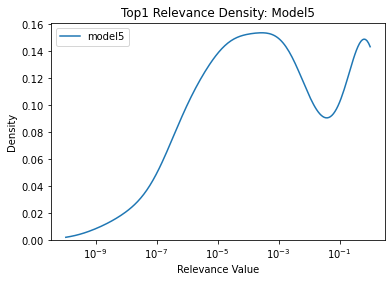

In [1209]:
distplot_relevance = sns.kdeplot(data=df_top1_relevance[['model5']], cut=0, log_scale=True)
distplot_relevance.set(xlabel= 'Relevance Value', title ='Top1 Relevance Density: Model5')

## Test Anotadas Bag

In [1410]:
bag_top_relevance = []
for tste in range(len(idx_sents_for_tag_final)):
    for i, idx_sent in enumerate(idx_sents_for_tag_final[tste]):
        test_sent = X_full[idx_sent]
        test_tag = y_full[idx_sent]
        if 0 in test_sent:
            end_sent = np.where(test_sent == 0)[0][0]
        else:
            end_sent = 75
        if end_sent > 5 and end_sent < 50:
            word_idx_target = sents_for_tag_final[tste][i]['idxAlvo']
            tag_target = sents_for_tag_final[tste][i]['trueTag']
            predition = predition_calc (models, test_sent)
            sorted_scr_list = sorted_scr_list_calc (test_sent, tags_set, word_idx_target, tag_target, models)
            top1_relevance, top2_relevance, top3_relevance, top4_relevance, top5_relevance = top5_relevance_calc (sorted_scr_list)
            line = {'sentence': idx_sent,
                    'word': word_idx_target,
                    'tag': tag_target,
                    'top1_relevance': top1_relevance,
                    'top2_relevance': top2_relevance,
                    'top3_relevance': top3_relevance,
                    'top4_relevance': top4_relevance,
                    'top5_relevance': top5_relevance}
            bag_top_relevance.append(line)
            print(len(bag_top_relevance), line['sentence'], words_set[test_sent[line['word']]], line['tag'])
len(bag_top_relevance)

1 19805 hill B-PER
2 18098 d. B-PER
3 11634 john B-PER
4 2858 black B-PER
5 3604 d. B-PER
6 8505 francisco B-PER
7 1574 fox B-PER
8 1133 muster B-PER
9 4692 tom B-PER
10 9435 mother B-PER
11 13584 santa B-PER
12 14323 s. B-PER
13 20016 brent B-PER
14 15704 mills B-PER
15 9321 clinton B-PER
16 12401 john B-PER
17 18290 mccarthy B-PER
18 359 royal B-PER
19 14847 costa B-PER
20 17506 tom B-PER
21 13002 morris B-PER
22 1579 fox B-PER
23 6480 d. B-PER
24 18525 ross B-PER
25 7147 bonds B-PER
26 9153 juan B-PER
27 3478 john B-PER
28 19772 dan B-PER
29 20018 tom B-PER
30 8398 dan B-PER
31 10252 williams B-PER
32 13475 baker B-PER
33 2151 brady B-PER
34 460 khan B-PER
35 4044 dundee B-PER
36 4135 mother B-PER
37 10283 bonnet B-PER
38 15709 mills B-PER
39 17776 washington B-PER
40 4223 nelson B-PER
41 755 johnson B-PER
42 11402 dole B-PER
43 8168 leon B-PER
44 17786 washington B-PER
45 15595 matthew B-PER
46 10267 john B-PER
47 19395 miguel B-PER
48 13523 clinton B-PER
49 4412 an B-PER
50 20723 

373 13683 nelson B-LOC
374 1336 hong B-LOC
375 7501 london B-LOC
376 2913 india B-LOC
377 6957 poland B-LOC
378 2481 ireland B-LOC
379 11254 moscow B-LOC
380 3125 st. B-LOC
381 492 switzerland B-LOC
382 14996 poland B-LOC
383 16717 australia B-LOC
384 17572 england B-LOC
385 11301 sen B-LOC
386 16596 united B-LOC
387 4297 iran B-LOC
388 14289 west B-LOC
389 2361 u.s. B-LOC
390 13509 virginia B-LOC
391 2560 australia B-LOC
392 11273 costa B-LOC
393 15968 australia B-LOC
394 1135 south B-LOC
395 16575 germany B-LOC
396 1590 india B-LOC
397 2446 u.s. B-LOC
398 14330 west B-LOC
399 12127 france B-LOC
400 18971 china B-LOC
401 1684 australia B-LOC
402 4913 pakistan B-LOC
403 691 france B-LOC
404 7859 washington B-LOC
405 11548 switzerland B-LOC
406 13261 california B-LOC
407 10021 france B-LOC
408 7058 u.s. B-LOC
409 17951 u.s. B-LOC
410 1755 jakarta B-LOC
411 6055 israel B-LOC
412 20006 atlanta B-LOC
413 14030 australia B-LOC
414 11387 united B-LOC
415 14729 u.s. B-LOC
416 16712 switzerlan

744 14259 bucharest I-ORG
745 19952 francisco I-ORG
746 12942 army I-ORG
747 17026 city I-ORG
748 19721 ( I-ORG
749 11592 bank I-ORG
750 3319 and I-ORG
751 12747 commission I-ORG
752 17056 county I-ORG
753 15676 's I-ORG
754 14229 moscow I-ORG
755 13884 and I-ORG
756 19715 ( I-ORG
757 7127 york I-ORG
758 14226 belgrade I-ORG
759 19731 ( I-ORG
760 1065 british I-ORG
761 20013 francisco I-ORG
762 18640 's I-ORG
763 5900 and I-ORG
764 18225 international I-ORG
765 18440 exchange I-ORG
766 6713 fc I-ORG
767 5996 union I-ORG
768 7892 assembly I-ORG
769 17249 jerusalem I-ORG
770 8899 office I-ORG
771 17170 union I-ORG
772 17300 york I-ORG
773 12729 times I-ORG
774 2830 party I-ORG
775 9625 europe I-ORG
776 14214 madrid I-ORG
777 776 city I-ORG
778 2596 ltd I-ORG
779 7457 de I-ORG
780 3133 mines I-ORG
781 3759 l I-ORG
782 20480 petroleum I-ORG
783 7850 washington I-ORG
784 9853 federation I-ORG
785 3358 securities I-ORG
786 7136 diego I-ORG
787 20660 national I-ORG
788 1472 foreign I-ORG
789 

849

In [1411]:
df_bag_relevance = pd.DataFrame(bag_top_relevance)

In [1412]:
df_bag_relevance.to_csv('df_bag_relevance3.csv', index=False)

In [1414]:
df_bag_relevance = pd.read_csv('df_bag_relevance3.csv')
df_bag_relevance.head()

,sentence,word,tag,top1_relevance,top2_relevance,top3_relevance,top4_relevance,top5_relevance
0,19805,5,B-PER,"[{'word': 4, 'value': 0.001278856274439022}, {...","[{'word': 8, 'value': 0.00010672863572835922},...","[{'word': 1, 'value': 7.354808622039855e-05}, ...","[{'word': 12, 'value': 6.215856410562992e-05},...","[{'word': 10, 'value': 2.9366929084062576e-05}..."
1,18098,0,B-PER,"[{'word': 1, 'value': 0.7584436573088169}, {'w...","[{'word': 5, 'value': 0.009189903736114502}, {...","[{'word': 2, 'value': 0.005529042333364487}, {...","[{'word': 4, 'value': 0.0038721710443496704}, ...","[{'word': 3, 'value': 0.0005009174346923828}, ..."
2,11634,1,B-PER,"[{'word': 2, 'value': 0.4962493544444442}, {'w...","[{'word': 0, 'value': 0.04156788159161806}, {'...","[{'word': 7, 'value': 0.000193864107131958}, {...","[{'word': 4, 'value': 8.216011337935925e-05}, ...","[{'word': 3, 'value': 3.21446277666837e-05}, {..."
3,2858,33,B-PER,"[{'word': 25, 'value': 0.000924285501241684}, ...","[{'word': 31, 'value': 0.0003095771826338023},...","[{'word': 34, 'value': 4.210105544188991e-05},...","[{'word': 18, 'value': 2.7846544981002808e-05}...","[{'word': 32, 'value': 2.581014996394515e-05},..."
4,3604,9,B-PER,"[{'word': 10, 'value': 0.9422031547874212}, {'...","[{'word': 11, 'value': 0.001606315141543746}, ...","[{'word': 14, 'value': 0.00034664967097342014}...","[{'word': 8, 'value': 0.0001915542088681832}, ...","[{'word': 6, 'value': 0.0001106590498238802}, ..."


## Test Ordem de Grandeza

In [8]:
df_bag_relevance.columns

Index(['sentence', 'word', 'tag', 'top1_relevance', 'top2_relevance',
       'top3_relevance', 'top4_relevance', 'top5_relevance', 'relevanceBag'],
      dtype='object')

In [60]:
iteration = list(df_bag_relevance.columns[:3]) + list([df_bag_relevance.columns[-1]])
iteration

['sentence', 'word', 'tag', 'relevanceBag']

In [47]:
top1_word = []
top1_value = []
top2_word = []
top2_value = []
top3_word = []
top3_value = []
top4_word = []
top4_value = []
top5_word = []
top5_value = []
for sent in df_bag_relevance.iloc:
    top1 = sent['top1_relevance'].split()
    top2 = sent['top2_relevance'].split()
    top3 = sent['top3_relevance'].split()
    top4 = sent['top4_relevance'].split()
    top5 = sent['top5_relevance'].split()
    top1_word.append(int(top1[1][:-1]))
    top1_value.append(float(top1[3][:-2]))
    top2_word.append(int(top2[1][:-1]))
    top2_value.append(float(top2[3][:-2]))
    top3_word.append(int(top3[1][:-1]))
    top3_value.append(float(top3[3][:-2]))
    top4_word.append(int(top4[1][:-1]))
    top4_value.append(float(top4[3][:-2]))
    top5_word.append(int(top5[1][:-1]))
    top5_value.append(float(top5[3][:-2]))

In [61]:
df_bag_relevance[iteration]

,sentence,word,tag,relevanceBag
0,19805,5,B-PER,[]
1,18098,0,B-PER,[1]
2,11634,1,B-PER,[2]
3,2858,33,B-PER,[]
4,3604,9,B-PER,[10]
...,...,...,...,...
844,20735,5,I-ORG,[4]
845,10719,1,I-ORG,[]
846,16211,1,I-ORG,[]
847,20437,15,I-ORG,[]


In [62]:
df_final_bag_relevance = df_bag_relevance[iteration]
df_final_bag_relevance['top1_word'] = top1_word
df_final_bag_relevance['top1_value'] = top1_value
df_final_bag_relevance['top2_word'] = top2_word
df_final_bag_relevance['top2_value'] = top2_value
df_final_bag_relevance['top3_word'] = top3_word
df_final_bag_relevance['top3_value'] = top3_value
df_final_bag_relevance['top4_word'] = top4_word
df_final_bag_relevance['top4_value'] = top4_value
df_final_bag_relevance['top5_word'] = top5_word
df_final_bag_relevance['top5_value'] = top5_value
df_final_bag_relevance

C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,sentence,word,tag,relevanceBag,top1_word,top1_value,top2_word,top2_value,top3_word,top3_value,top4_word,top4_value,top5_word,top5_value
0,19805,5,B-PER,[],4,0.001279,8,0.000107,1,0.000074,12,0.000062,10,0.000029
1,18098,0,B-PER,[1],1,0.758444,5,0.009190,2,0.005529,4,0.003872,3,0.000501
2,11634,1,B-PER,[2],2,0.496249,0,0.041568,7,0.000194,4,0.000082,3,0.000032
3,2858,33,B-PER,[],25,0.000924,31,0.000310,34,0.000042,18,0.000028,32,0.000026
4,3604,9,B-PER,[10],10,0.942203,11,0.001606,14,0.000347,8,0.000192,6,0.000111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,20735,5,I-ORG,[4],4,0.102605,3,0.005411,7,0.004770,6,0.001402,0,0.001320
845,10719,1,I-ORG,[],0,0.194286,2,0.005543,4,0.000826,3,0.000338,5,0.000141
846,16211,1,I-ORG,[],0,0.043049,2,0.018532,11,0.002660,3,0.001182,4,0.001041
847,20437,15,I-ORG,[],14,0.311182,12,0.111136,13,0.084085,10,0.025119,11,0.018947


In [63]:
df_final_bag_relevance.to_csv('df_bag_relevance_final.csv', index=False)

In [87]:
bag = []

for line in df_final_bag_relevance.iloc:
    str_bag = line['relevanceBag'].split()
    if str_bag[0] == '[]':
        temp_bag = []
    elif len(str_bag) == 1:
        temp_bag = [int(str_bag[0][1:-1])]
    else:
        temp_bag = [int(str_bag[0][1:-1]), int(str_bag[-1][:-1])]
        for item in str_bag[1:-1]:
            temp_bag.append(int(item[:-1]))
    bag.append(temp_bag)
    
len(bag)

849

In [114]:
#real_value = []
top1_real = []
top1_miss = []
top2_real = []
top2_miss = []
top3_real = []
top3_miss = []
top4_real = []
top4_miss = []
top5_real = []
top5_miss = []
for i, line in enumerate(df_final_bag_relevance.iloc):
    if line['top1_word'] in bag[i]:
        #real_value.append(line['top1_value'])
        top1_real.append(line['top1_value'])
    else:
        top1_miss.append(line['top1_value'])
    if line['top2_word'] in bag[i]:
        #real_value.append(line['top2_value'])
        top2_real.append(line['top2_value'])
    else:
        top2_miss.append(line['top2_value'])
    if line['top3_word'] in bag[i]:
        #real_value.append(line['top3_value'])
        top3_real.append(line['top3_value'])
    else:
        top3_miss.append(line['top3_value'])
    if line['top4_word'] in bag[i]:
        #real_value.append(line['top4_value'])
        top4_real.append(line['top4_value'])
    else:
        top4_miss.append(line['top4_value'])
    if line['top5_word'] in bag[i]:
        #real_value.append(line['top5_value'])
        top5_real.append(line['top5_value'])
    else:
        top5_miss.append(line['top5_value'])

In [125]:
top_real = {'rank1': top1_real,
            'rank2': top2_real,
            'rank3': top3_real,
            'rank4': top4_real,
            'rank5': top5_real}
top_miss = {'rank1': top1_miss,
            'rank2': top2_miss,
            'rank3': top3_miss,
            'rank4': top4_miss,
            'rank5': top5_miss}
real_value = top1_real + top2_real + top3_real + top4_real + top5_real
miss_value = top1_miss + top2_miss + top3_miss + top4_miss + top5_miss
full_value = {'real': real_value,
             'miss': miss_value}

In [348]:
len_top_real = {'rank1': len(top1_real),
            'rank2': len(top2_real),
            'rank3': len(top3_real),
            'rank4': len(top4_real),
            'rank5': len(top5_real)}
len_top_miss = {'rank1': len(top1_miss),
            'rank2': len(top2_miss),
            'rank3': len(top3_miss),
            'rank4': len(top4_miss),
            'rank5': len(top5_miss)}
len_top_real, len_top_miss

({'rank1': 190, 'rank2': 62, 'rank3': 35, 'rank4': 21, 'rank5': 9},
 {'rank1': 659, 'rank2': 787, 'rank3': 814, 'rank4': 828, 'rank5': 840})

In [349]:
190+ 62+ 35+ 21+ 9

317

In [350]:
659+ 787+ 814+ 828+ 840

3928

In [351]:
len_top_real = {'rank1': len(top1_real)/317,
            'rank2': len(top2_real)/317,
            'rank3': len(top3_real)/317,
            'rank4': len(top4_real)/317,
            'rank5': len(top5_real)/317}
len_top_miss = {'rank1': len(top1_miss)/3928,
            'rank2': len(top2_miss)/3928,
            'rank3': len(top3_miss)/3928,
            'rank4': len(top4_miss)/3928,
            'rank5': len(top5_miss)/3928}
len_top_real, len_top_miss

({'rank1': 0.5993690851735016,
  'rank2': 0.19558359621451105,
  'rank3': 0.11041009463722397,
  'rank4': 0.06624605678233439,
  'rank5': 0.028391167192429023},
 {'rank1': 0.16776985743380857,
  'rank2': 0.20035641547861507,
  'rank3': 0.20723014256619143,
  'rank4': 0.21079429735234215,
  'rank5': 0.21384928716904278})

<AxesSubplot:title={'center':'(b) Palavras Não Anotadas'}, ylabel='Percent'>

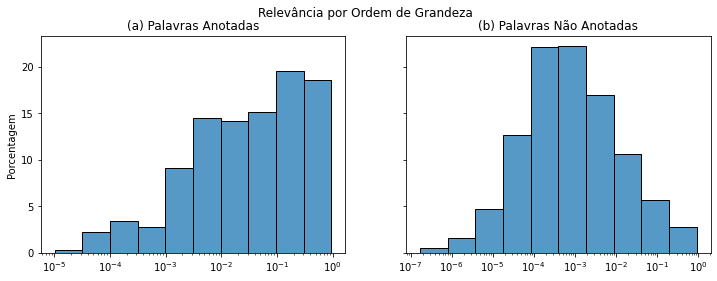

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Relevância por Ordem de Grandeza')
axes[0].set_title('(a) Palavras Anotadas')
axes[1].set_title('(b) Palavras Não Anotadas')

ax1 = sns.histplot(ax=axes[0], data=real_value, stat='percent', log_scale = True, bins = 10)
ax1.set(ylabel = "Porcentagem")
sns.histplot(ax=axes[1], data=miss_value, stat='percent', log_scale = True, bins = 10)

<AxesSubplot:title={'center':'(b) Palavras Não Anotadas'}, ylabel='Density'>

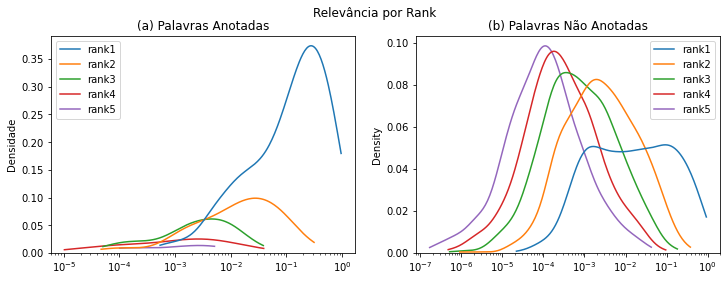

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Relevância por Rank')
axes[0].set_title('(a) Palavras Anotadas')
axes[1].set_title('(b) Palavras Não Anotadas')

ax1 = sns.kdeplot(ax=axes[0], data=top_real, cut=0, log_scale = True)
ax1.set(ylabel = "Densidade")
ax2 = sns.kdeplot(ax=axes[1], data=top_miss, cut=0, log_scale = True)
ax2.set(ylabel = "Densidade")

In [158]:
top1_bag_relevance = []
for sentdf in df_bag_relevance.iloc:
    line = {'sentence': sentdf['sentence'],
            'word': sentdf['word'],
            'tag': sentdf['tag'],
            'relevanceBag': sentdf['relevanceBag'],
            'model1': float(sentdf['top1_relevance'].split()[3][:-2]),
            'model2': float(sentdf['top1_relevance'].split()[7][:-2]),
            'model3': float(sentdf['top1_relevance'].split()[11][:-2]),
            'model4': float(sentdf['top1_relevance'].split()[15][:-2]),
            'model5': float(sentdf['top1_relevance'].split()[19][:-2])}
    top1_bag_relevance.append(line)
df_top1_relevance = pd.DataFrame(top1_bag_relevance)
df_top1_relevance.to_csv('df_top1_relevance.csv', index=False)
df_top1_relevance.head()

,sentence,word,tag,relevanceBag,model1,model2,model3,model4,model5
0,19805,5,B-PER,[],0.001279,0.001719,0.001316,0.000019,0.000006
1,18098,0,B-PER,[1],0.758444,0.966856,0.995957,0.999299,0.999964
2,11634,1,B-PER,[2],0.496249,0.833664,0.941314,0.997648,0.999854
3,2858,33,B-PER,[],0.000924,0.000226,0.000218,0.000091,0.000078
4,3604,9,B-PER,[10],0.942203,0.984693,0.987947,0.999517,0.999928


[Text(0.5, 1.0, 'Densidade das Relevâncias por Modelo - Rank 1'),
 Text(0, 0.5, 'Densidade')]

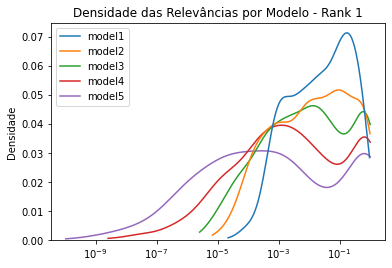

In [187]:
distplot_relevance = sns.kdeplot(data=df_top1_relevance[['model1', 'model2', 'model3', 'model4', 'model5']], cut=0, log_scale=True)
distplot_relevance.set(title ='Densidade das Relevâncias por Modelo - Rank 1', ylabel = "Densidade")

In [160]:
top2_bag_relevance = []
for sentdf in df_bag_relevance.iloc:
    line = {'sentence': sentdf['sentence'],
            'word': sentdf['word'],
            'tag': sentdf['tag'],
            'relevanceBag': sentdf['relevanceBag'],
            'model1': float(sentdf['top2_relevance'].split()[3][:-2]),
            'model2': float(sentdf['top2_relevance'].split()[7][:-2]),
            'model3': float(sentdf['top2_relevance'].split()[11][:-2]),
            'model4': float(sentdf['top2_relevance'].split()[15][:-2]),
            'model5': float(sentdf['top2_relevance'].split()[19][:-2])}
    top2_bag_relevance.append(line)
df_top2_relevance = pd.DataFrame(top2_bag_relevance)
df_top2_relevance.to_csv('df_top2_relevance.csv', index=False)
df_top2_relevance.head()

,sentence,word,tag,relevanceBag,model1,model2,model3,model4,model5
0,19805,5,B-PER,[],0.000107,0.000121,0.000103,0.000003,1.661803e-07
1,18098,0,B-PER,[1],0.009190,0.039123,0.026402,0.000246,1.811981e-05
2,11634,1,B-PER,[2],0.041568,0.015051,0.011608,0.020107,5.891066e-04
3,2858,33,B-PER,[],0.000310,0.000142,0.000168,0.000010,5.184457e-05
4,3604,9,B-PER,[10],0.001606,0.000447,0.000750,0.000044,6.003180e-06


In [162]:
top3_bag_relevance = []
for sentdf in df_bag_relevance.iloc:
    line = {'sentence': sentdf['sentence'],
            'word': sentdf['word'],
            'tag': sentdf['tag'],
            'relevanceBag': sentdf['relevanceBag'],
            'model1': float(sentdf['top3_relevance'].split()[3][:-2]),
            'model2': float(sentdf['top3_relevance'].split()[7][:-2]),
            'model3': float(sentdf['top3_relevance'].split()[11][:-2]),
            'model4': float(sentdf['top3_relevance'].split()[15][:-2]),
            'model5': float(sentdf['top3_relevance'].split()[19][:-2])}
    top3_bag_relevance.append(line)
df_top3_relevance = pd.DataFrame(top3_bag_relevance)
df_top3_relevance.to_csv('df_top3_relevance.csv', index=False)
df_top3_relevance.head()

,sentence,word,tag,relevanceBag,model1,model2,model3,model4,model5
0,19805,5,B-PER,[],0.000074,0.000036,0.000074,8.601633e-07,1.060154e-07
1,18098,0,B-PER,[1],0.005529,0.011406,0.000970,8.626813e-06,4.215002e-06
2,11634,1,B-PER,[2],0.000194,0.012272,0.005325,1.666232e-04,9.675783e-07
3,2858,33,B-PER,[],0.000042,0.000111,0.000100,2.367669e-06,3.145658e-06
4,3604,9,B-PER,[10],0.000347,0.000114,0.000047,3.335409e-07,1.192093e-07


In [165]:
top4_bag_relevance = []
for sentdf in df_bag_relevance.iloc:
    line = {'sentence': sentdf['sentence'],
            'word': sentdf['word'],
            'tag': sentdf['tag'],
            'relevanceBag': sentdf['relevanceBag'],
            'model1': float(sentdf['top4_relevance'].split()[3][:-2]),
            'model2': float(sentdf['top4_relevance'].split()[7][:-2]),
            'model3': float(sentdf['top4_relevance'].split()[11][:-2]),
            'model4': float(sentdf['top4_relevance'].split()[15][:-2]),
            'model5': float(sentdf['top4_relevance'].split()[19][:-2])}
    top4_bag_relevance.append(line)
df_top4_relevance = pd.DataFrame(top4_bag_relevance)
df_top4_relevance.to_csv('df_top4_relevance.csv', index=False)
df_top4_relevance.head()

,sentence,word,tag,relevanceBag,model1,model2,model3,model4,model5
0,19805,5,B-PER,[],0.000062,0.000027,0.000021,3.425179e-07,4.238952e-08
1,18098,0,B-PER,[1],0.003872,0.000628,0.000017,4.053116e-06,2.026558e-06
2,11634,1,B-PER,[2],0.000082,0.000036,0.000227,4.146477e-05,1.256671e-07
3,2858,33,B-PER,[],0.000028,0.000071,0.000079,1.249925e-06,2.302599e-07
4,3604,9,B-PER,[10],0.000192,0.000106,0.000027,1.928669e-07,2.539914e-08


In [166]:
top5_bag_relevance = []
for sentdf in df_bag_relevance.iloc:
    line = {'sentence': sentdf['sentence'],
            'word': sentdf['word'],
            'tag': sentdf['tag'],
            'relevanceBag': sentdf['relevanceBag'],
            'model1': float(sentdf['top5_relevance'].split()[3][:-2]),
            'model2': float(sentdf['top5_relevance'].split()[7][:-2]),
            'model3': float(sentdf['top5_relevance'].split()[11][:-2]),
            'model4': float(sentdf['top5_relevance'].split()[15][:-2]),
            'model5': float(sentdf['top5_relevance'].split()[19][:-2])}
    top5_bag_relevance.append(line)
df_top5_relevance = pd.DataFrame(top5_bag_relevance)
df_top5_relevance.to_csv('df_top5_relevance.csv', index=False)
df_top5_relevance.head()

,sentence,word,tag,relevanceBag,model1,model2,model3,model4,model5
0,19805,5,B-PER,[],0.000029,0.000023,1.869620e-05,1.964021e-07,2.882021e-08
1,18098,0,B-PER,[1],0.000501,0.000201,8.324670e-06,2.897710e-06,1.929552e-07
2,11634,1,B-PER,[2],0.000032,0.000005,3.100273e-07,2.136602e-09,3.201970e-11
3,2858,33,B-PER,[],0.000026,0.000045,4.358192e-05,1.119383e-06,1.670604e-07
4,3604,9,B-PER,[10],0.000111,0.000059,1.278598e-05,1.192093e-07,1.463360e-08


C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gfra2\anaconda3\envs\projeto_20220828\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'(d) Rank 5'}, ylabel='Density'>

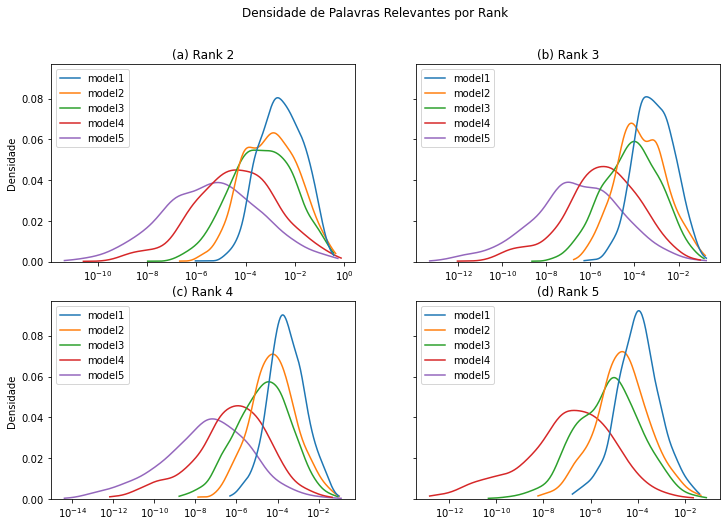

In [189]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes por Rank')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model1', 'model2', 'model3', 'model4', 'model5']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model1', 'model2', 'model3', 'model4', 'model5']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model1', 'model2', 'model3', 'model4', 'model5']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model1', 'model2', 'model3', 'model4', 'model5']], cut=0, log_scale=True)

In [285]:
top1_media = []
top2_media = []
top3_media = []
top4_media = []
top5_media = []
top1_rnd = []
top2_rnd = []
top3_rnd = []
top4_rnd = []
top5_rnd = []
for i, line in enumerate(df_final_bag_relevance.iloc):
    if len(bag[i]) > 0:
        s = line['sentence']
        tam = len(X_full[s][:np.where(X_full[s] == 0)[0][0]])
        rnd_list = rnd.sample(range(tam), k=5)
        top1_rnd_temp = len(list(set(bag[i]) & set(rnd_list[:1])))/1
        top2_rnd_temp = len(list(set(bag[i]) & set(rnd_list[:2])))/2
        top3_rnd_temp = len(list(set(bag[i]) & set(rnd_list[:3])))/3
        top4_rnd_temp = len(list(set(bag[i]) & set(rnd_list[:4])))/4
        top5_rnd_temp = len(list(set(bag[i]) & set(rnd_list[:5])))/5
        if line['top1_word'] in bag[i]:
            top1_temp = 1
        else:
            top1_temp = 0
        if line['top2_word'] in bag[i]:
            top2_temp = 1
        else:
            top2_temp = 0
        if line['top3_word'] in bag[i]:
            top3_temp = 1
        else:
            top3_temp = 0
        if line['top4_word'] in bag[i]:
            top4_temp = 1
        else:
            top4_temp = 0
        if line['top5_word'] in bag[i]:
            top5_temp = 1
        else:
            top5_temp = 0
        top1_media.append(np.mean([top1_temp]))
        top2_media.append(np.mean([top1_temp, top2_temp]))
        top3_media.append(np.mean([top1_temp, top2_temp, top3_temp]))
        top4_media.append(np.mean([top1_temp, top2_temp, top3_temp, top4_temp]))
        top5_media.append(np.mean([top1_temp, top2_temp, top3_temp, top4_temp, top5_temp]))    
        
        top1_rnd.append(np.mean([top1_rnd_temp]))
        top2_rnd.append(np.mean([top1_rnd_temp, top2_rnd_temp]))
        top3_rnd.append(np.mean([top1_rnd_temp, top2_rnd_temp, top3_rnd_temp]))
        top4_rnd.append(np.mean([top1_rnd_temp, top2_rnd_temp, top3_rnd_temp, top4_rnd_temp]))
        top5_rnd.append(np.mean([top1_rnd_temp, top2_rnd_temp, top3_rnd_temp, top4_rnd_temp, top5_rnd_temp]))    

In [291]:
media_p = {'1': np.mean(top1_media),
           '2': np.mean(top2_media),
           '3': np.mean(top3_media),
           '4': np.mean(top4_media),
           '5': np.mean(top5_media)}
media_rnd = {'1': np.mean(top1_rnd),
           '2': np.mean(top2_rnd),
           '3': np.mean(top3_rnd),
           '4': np.mean(top4_rnd),
           '5': np.mean(top5_rnd)}

In [292]:
media_p, media_rnd

({'1': 0.6551724137931034,
  '2': 0.43448275862068964,
  '3': 0.32988505747126434,
  '4': 0.2655172413793103,
  '5': 0.2186206896551724},
 {'1': 0.06206896551724138,
  '2': 0.06465517241379311,
  '3': 0.06915708812260536,
  '4': 0.07083333333333333,
  '5': 0.07142528735632184})

[Text(0.5, 1.0, 'Valor da Precisão nas K-ésimas Posições'),
 Text(0, 0.5, 'Média de P@K')]

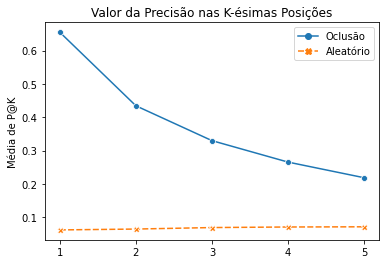

In [294]:
p = sns.lineplot(data={'Oclusão': media_p, 'Aleatório': media_rnd}, markers=True)
p.set(title ='Valor da Precisão nas K-ésimas Posições', ylabel = "Média de P@K")

<AxesSubplot:title={'center':'(d) Rank 5'}, ylabel='Density'>

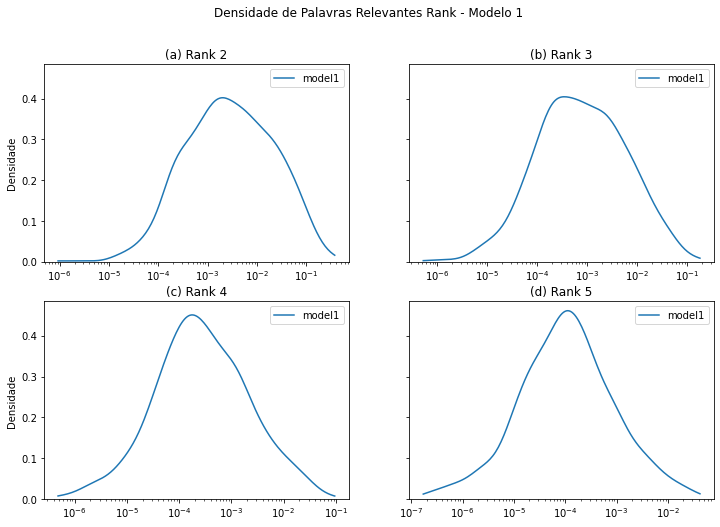

In [340]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes Rank - Modelo 1')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model1']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model1']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model1']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model1']], cut=0, log_scale=True)

<AxesSubplot:title={'center':'(d) Rank 5'}, ylabel='Density'>

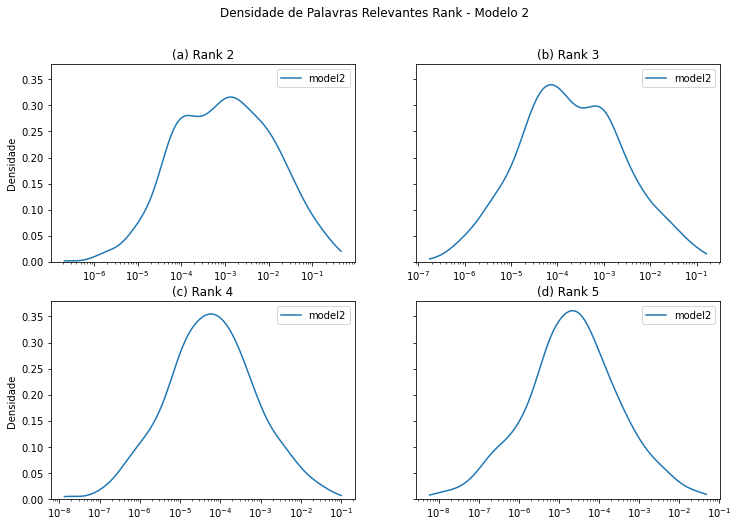

In [342]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes Rank - Modelo 2')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model2']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model2']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model2']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model2']], cut=0, log_scale=True)

<AxesSubplot:title={'center':'(d) Rank 5'}, ylabel='Density'>

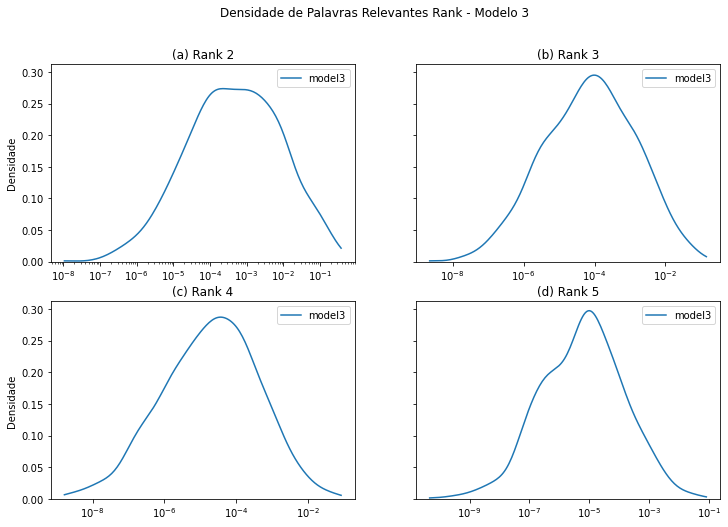

In [343]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes Rank - Modelo 3')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model3']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model3']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model3']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model3']], cut=0, log_scale=True)

<AxesSubplot:title={'center':'(d) Rank 5'}, ylabel='Density'>

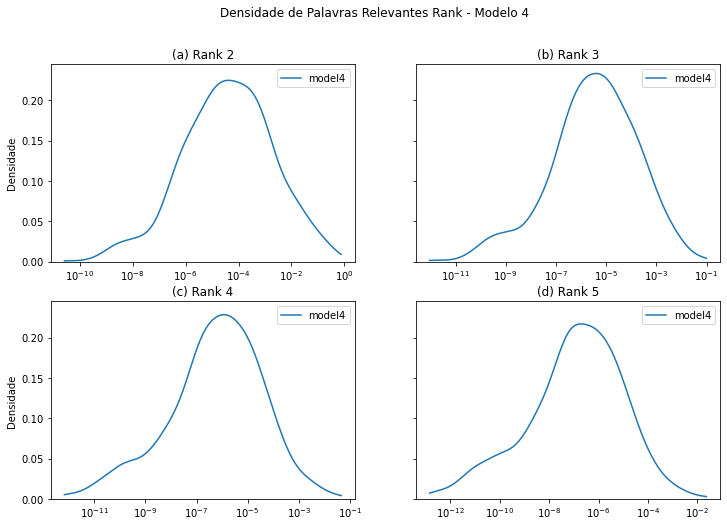

In [344]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes Rank - Modelo 4')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model4']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model4']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model4']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model4']], cut=0, log_scale=True)

[Text(0, 0.5, 'Densidade')]

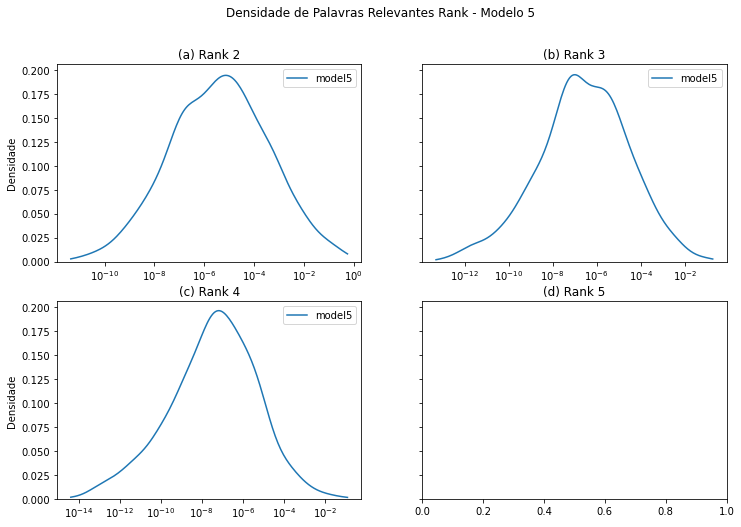

In [346]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Densidade de Palavras Relevantes Rank - Modelo 5')
axes[0][0].set_title('(a) Rank 2')
axes[0][1].set_title('(b) Rank 3')
axes[1][0].set_title('(c) Rank 4')
axes[1][1].set_title('(d) Rank 5')

ax1 = sns.kdeplot(ax=axes[0][0], data=df_top2_relevance[['model5']], cut=0, log_scale=True)
ax1.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[0][1], data=df_top3_relevance[['model5']], cut=0, log_scale=True)
ax3 = sns.kdeplot(ax=axes[1][0], data=df_top4_relevance[['model5']], cut=0, log_scale=True)
ax3.set(ylabel = "Densidade")
sns.kdeplot(ax=axes[1][1], data=df_top5_relevance[['model5']], cut=0, log_scale=True)